In [150]:
import csv
import sklearn
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics

In [151]:
ds=pd.read_csv('happiness_score_dataset.csv')
ds

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [152]:
ds_columns = ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Generosity','Trust (Government Corruption)','Dystopia Residual']

In [153]:
ds=ds[ds_columns].copy()

In [154]:
happy_df = ds.rename({'Country':'country', 'Region':'region', 'Happiness Rank' :'happiness_rank', 'Happiness Score':'happiness_score', 'Economy (GDP per Capita)':'economy', 'Family':'family', 'Health (Life Expectancy)':'health', 'Freedom':'freedom', 'Generosity':'generosity','Trust (Government Corruption)':'trust', 'Dystopia Residual':'dystopia_residual'},axis=1)

In [155]:
happy_df.head()

,country,region,happiness_rank,happiness_score,economy,family,health,freedom,generosity,trust,dystopia_residual
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2.46531
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2.45176


In [156]:
happy_df.isnull().sum()

country              0
region               0
happiness_rank       0
happiness_score      0
economy              0
family               0
health               0
freedom              0
generosity           0
trust                0
dystopia_residual    0
dtype: int64

Text(0, 0.5, 'Economy (GDP per Capita)')

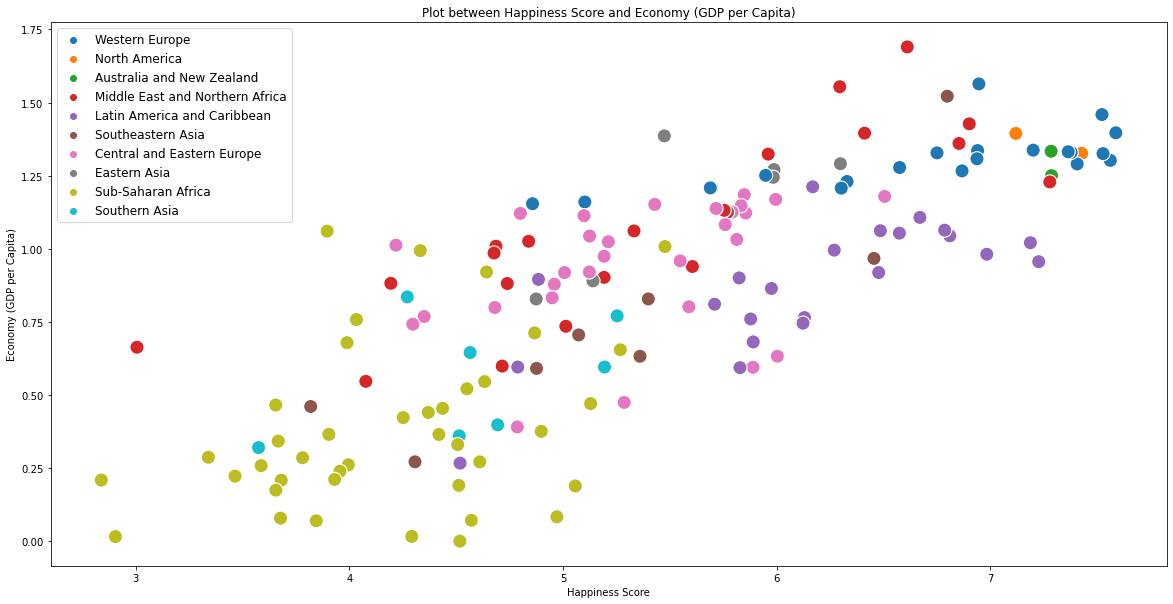

In [157]:
#plot happiness and GDP
plt.figure(figsize=(20,10))
plt.title('Plot between Happiness Score and Economy (GDP per Capita)')
sns.scatterplot(x = happy_df.happiness_score, y = happy_df.economy, hue = happy_df.region, s = 200);

plt.legend(loc = 'upper left', fontsize='12')
plt.xlabel('Happiness Score')
plt.ylabel('Economy (GDP per Capita)')

In [158]:
economy_region=happy_df.groupby('region')['economy'].sum()
economy_region

region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: economy, dtype: float64

Text(0, 0.5, '')

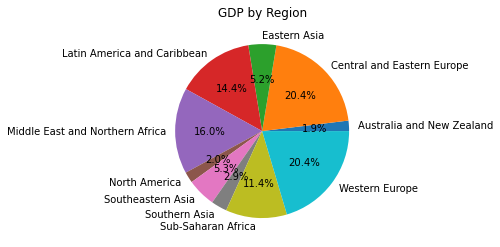

In [159]:
economy_region.plot.pie(autopct = '%1.1f%%')
plt.title('GDP by Region')
plt.ylabel('')

In [160]:
#Total Countries
total_country = happy_df.groupby('region')[['country']].count()
print(total_country)

                                 country
region                                  
Australia and New Zealand              2
Central and Eastern Europe            29
Eastern Asia                           6
Latin America and Caribbean           22
Middle East and Northern Africa       20
North America                          2
Southeastern Asia                      9
Southern Asia                          7
Sub-Saharan Africa                    40
Western Europe                        21


C:\Users\Admin\AppData\Local\Temp\ipykernel_11676\2986536942.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(cor, mask = np.zeros_like(cor, dtype=np.bool),


<AxesSubplot:>

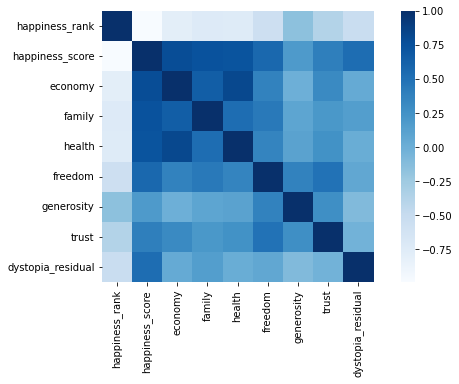

In [161]:
#Correlation map

cor = happy_df.corr(method="pearson")
f, ax = plt.subplots(figsize=(10,5))
sns.heatmap(cor, mask = np.zeros_like(cor, dtype=np.bool),
            cmap="Blues", square=True,ax=ax)

In [162]:
#corruption in region
corruption = happy_df.groupby('region')[['trust']].mean()
corruption

,trust
region,
Australia and New Zealand,0.392795
Central and Eastern Europe,0.086674
Eastern Asia,0.127695
Latin America and Caribbean,0.117172
Middle East and Northern Africa,0.181702
North America,0.244235
Southeastern Asia,0.151276
Southern Asia,0.102536
Sub-Saharan Africa,0.123878


<BarContainer object of 10 artists>

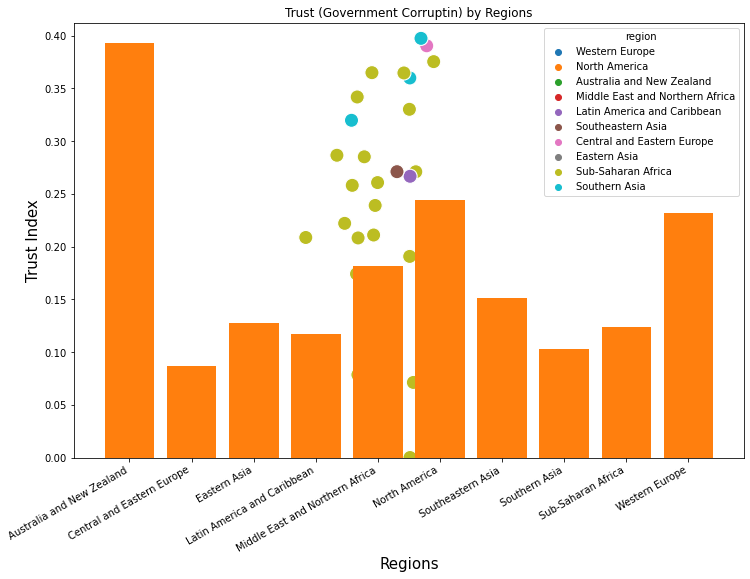

In [163]:
plt.figure(figsize=(12,8))
plt.title('Trust (Government Corruptin) by Regions')
sns.scatterplot(x = happy_df.happiness_score, y = happy_df.economy, hue = happy_df.region, s = 200);

plt.xlabel('Regions', fontsize=15)
plt.ylabel('Trust Index', fontsize = 15)
plt.xticks(rotation = 30, ha='right')
plt.bar(corruption.index,corruption.trust)

In [164]:
top_10=happy_df.head(10)
bottom_10=happy_df.tail(10)

C:\Users\Admin\AppData\Local\Temp\ipykernel_11676\2545236963.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
C:\Users\Admin\AppData\Local\Temp\ipykernel_11676\2545236963.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(xlabels, rotation=45, ha='right')


Text(603.9818181818181, 0.5, 'Health(Life expectancy)')

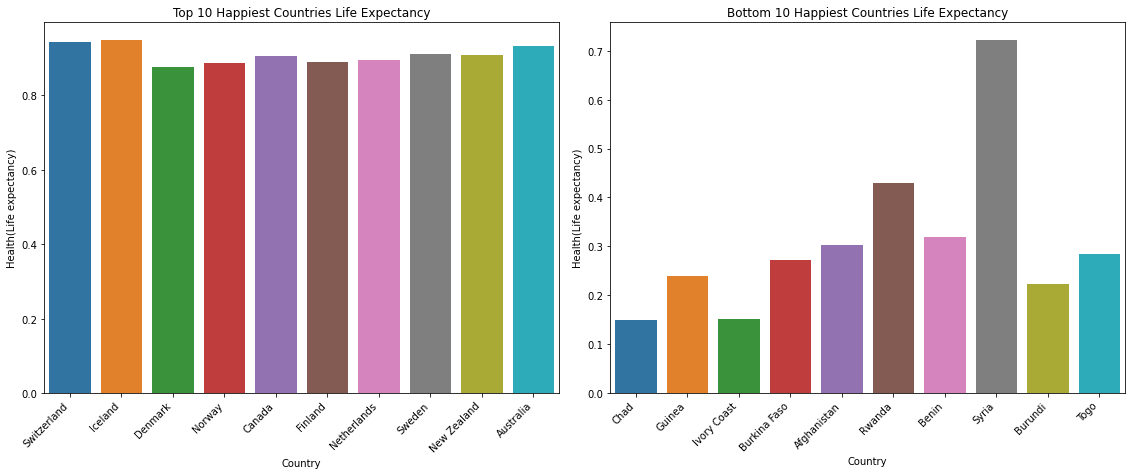

In [165]:
fig, axes = plt.subplots(1,2, figsize = (16,6))
plt.tight_layout(pad=2)
xlabels=top_10.country
axes[0].set_title('Top 10 Happiest Countries Life Expectancy')
axes[0].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x=top_10.country, y=top_10.health, ax=axes[0])
axes[0].set_xlabel('Country')
axes[0].set_ylabel('Health(Life expectancy)')

xlabels=bottom_10.country
axes[1].set_title('Bottom 10 Happiest Countries Life Expectancy')
axes[1].set_xticklabels(xlabels, rotation=45, ha='right')
sns.barplot(x=bottom_10.country, y=bottom_10.health, ax=axes[1])
axes[1].set_xlabel('Country')
axes[1].set_ylabel('Health(Life expectancy)')

Text(0, 0.5, 'Happiness Score')

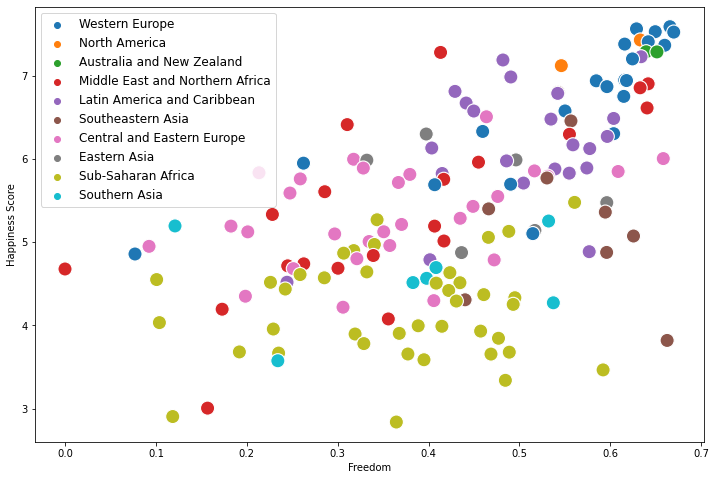

In [166]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=happy_df.freedom,y=happy_df.happiness_score, hue = happy_df.region, s = 200)
plt.legend(loc = 'upper left', fontsize = '12')
plt.xlabel('Freedom')
plt.ylabel('Happiness Score')

<BarContainer object of 10 artists>

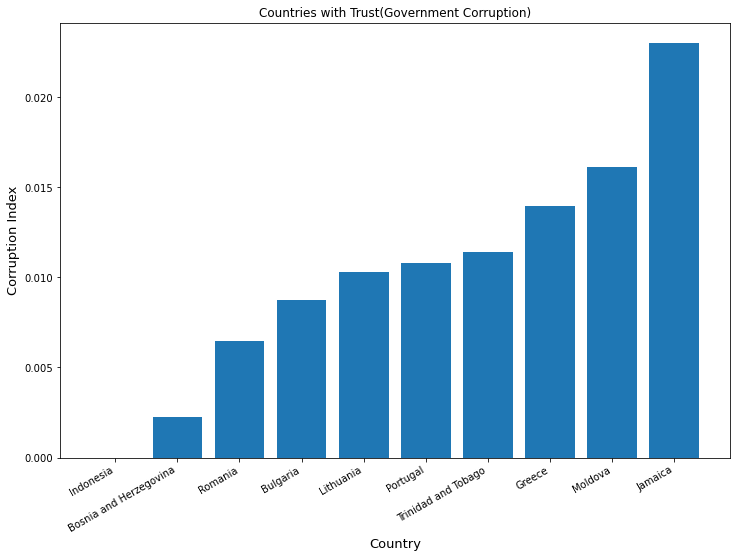

In [167]:
country = happy_df.sort_values(by='trust').head(10)
plt.figure(figsize=(12,8))
plt.title('Countries with Trust(Government Corruption)')
plt.xlabel('Country', fontsize=13)
plt.ylabel('Corruption Index', fontsize = 13)
plt.xticks(rotation = 30, ha='right')
plt.bar(country.country, country.trust)

<BarContainer object of 10 artists>

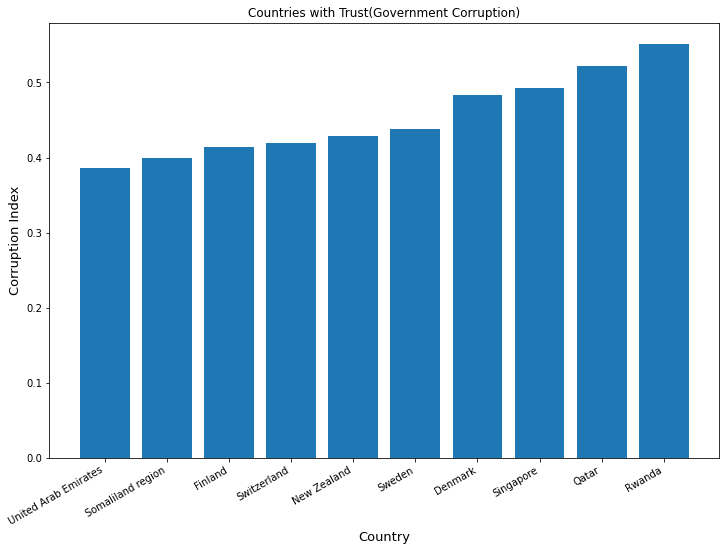

In [168]:
country = happy_df.sort_values(by='trust').tail(10)
plt.figure(figsize=(12,8))
plt.title('Countries with Trust(Government Corruption)')
plt.xlabel('Country', fontsize=13)
plt.ylabel('Corruption Index', fontsize = 13)
plt.xticks(rotation = 30, ha='right')
plt.bar(country.country, country.trust)

Text(0, 0.5, 'Corruption')

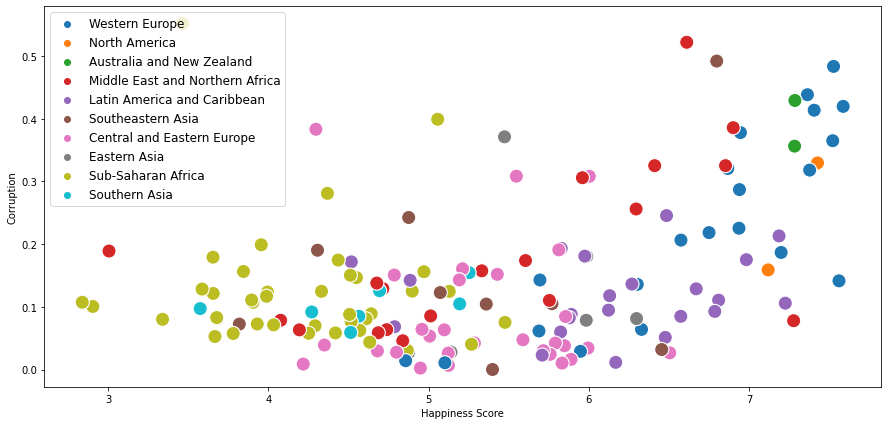

In [169]:
#corruption vs happiness
plt.figure(figsize=(15,7))
sns.scatterplot(x=happy_df.happiness_score, y=happy_df.trust, hue = happy_df.region, s=200)
plt.legend(loc='upper left', fontsize = '12')
plt.xlabel('Happiness Score')
plt.ylabel('Corruption') 

In [170]:
ds.shape

(158, 11)

In [171]:
ds.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Generosity                       float64
Trust (Government Corruption)    float64
Dystopia Residual                float64
dtype: object

In [172]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Generosity                     158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 13.7+ KB


In [173]:
ds.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Trust (Government Corruption)',
       'Dystopia Residual'],
      dtype='object')

In [174]:
ds.describe()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.846137,0.991046,0.630259,0.428615,0.237296,0.143422,2.098977
std,45.754363,1.145010,0.403121,0.272369,0.247078,0.150693,0.126685,0.120034,0.553550
min,1.000000,2.839000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.545808,0.856823,0.439185,0.328330,0.150553,0.061675,1.759410
50%,79.500000,5.232500,0.910245,1.029510,0.696705,0.435515,0.216130,0.107220,2.095415
75%,118.750000,6.243750,1.158448,1.214405,0.811013,0.549092,0.309883,0.180255,2.462415
max,158.000000,7.587000,1.690420,1.402230,1.025250,0.669730,0.795880,0.551910,3.602140


<AxesSubplot:>

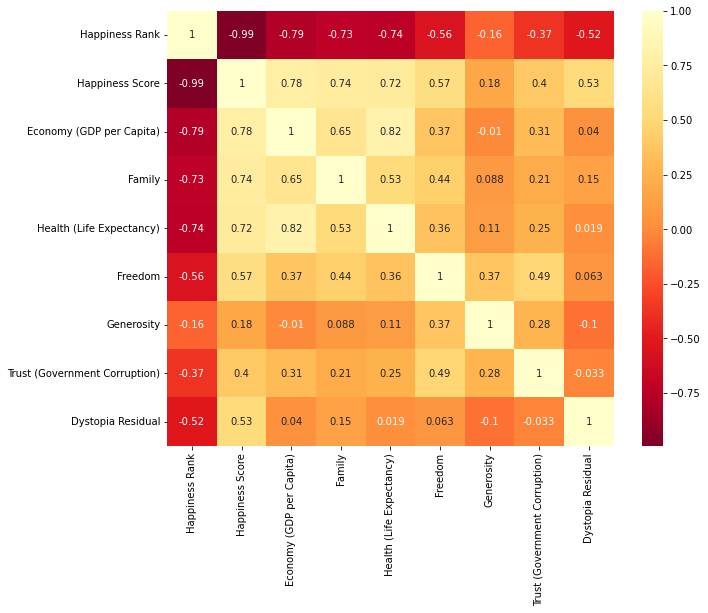

In [175]:
import seaborn as sns
import matplotlib.pylab as plt
plt.figure(figsize=(10,8))
sns.heatmap(ds.corr(),annot=True,cmap='YlOrRd_r')

From this heat map we can find that Economy(GDP per capita) and Happyness score highly related(079),similarly family, health are also highly related with happiness score. Economy(GDP per capita) AND HEALTH are highly corelated 0.82

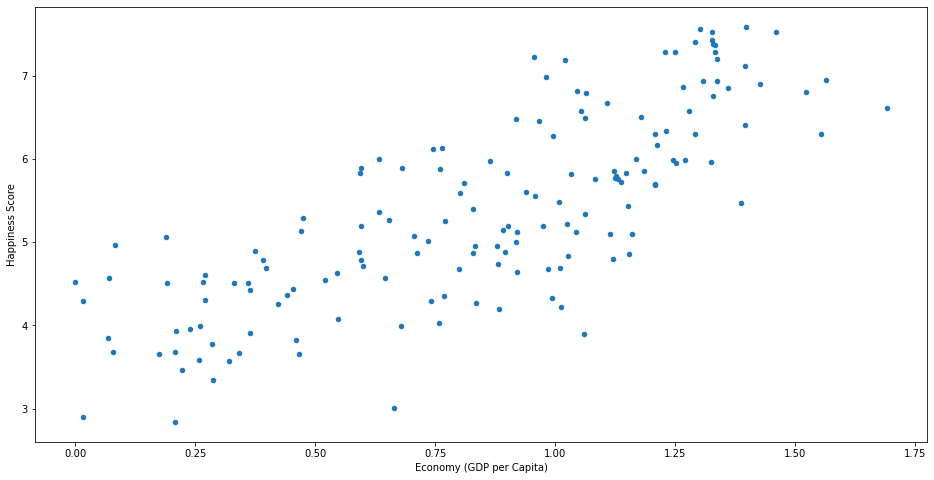

In [176]:
ds.plot(kind='scatter',x='Economy (GDP per Capita)',y='Happiness Score',figsize=(16,8))
plt.show()

from this we can interpert that positive relation between Economy (GDP per Capita) and Happiness Score

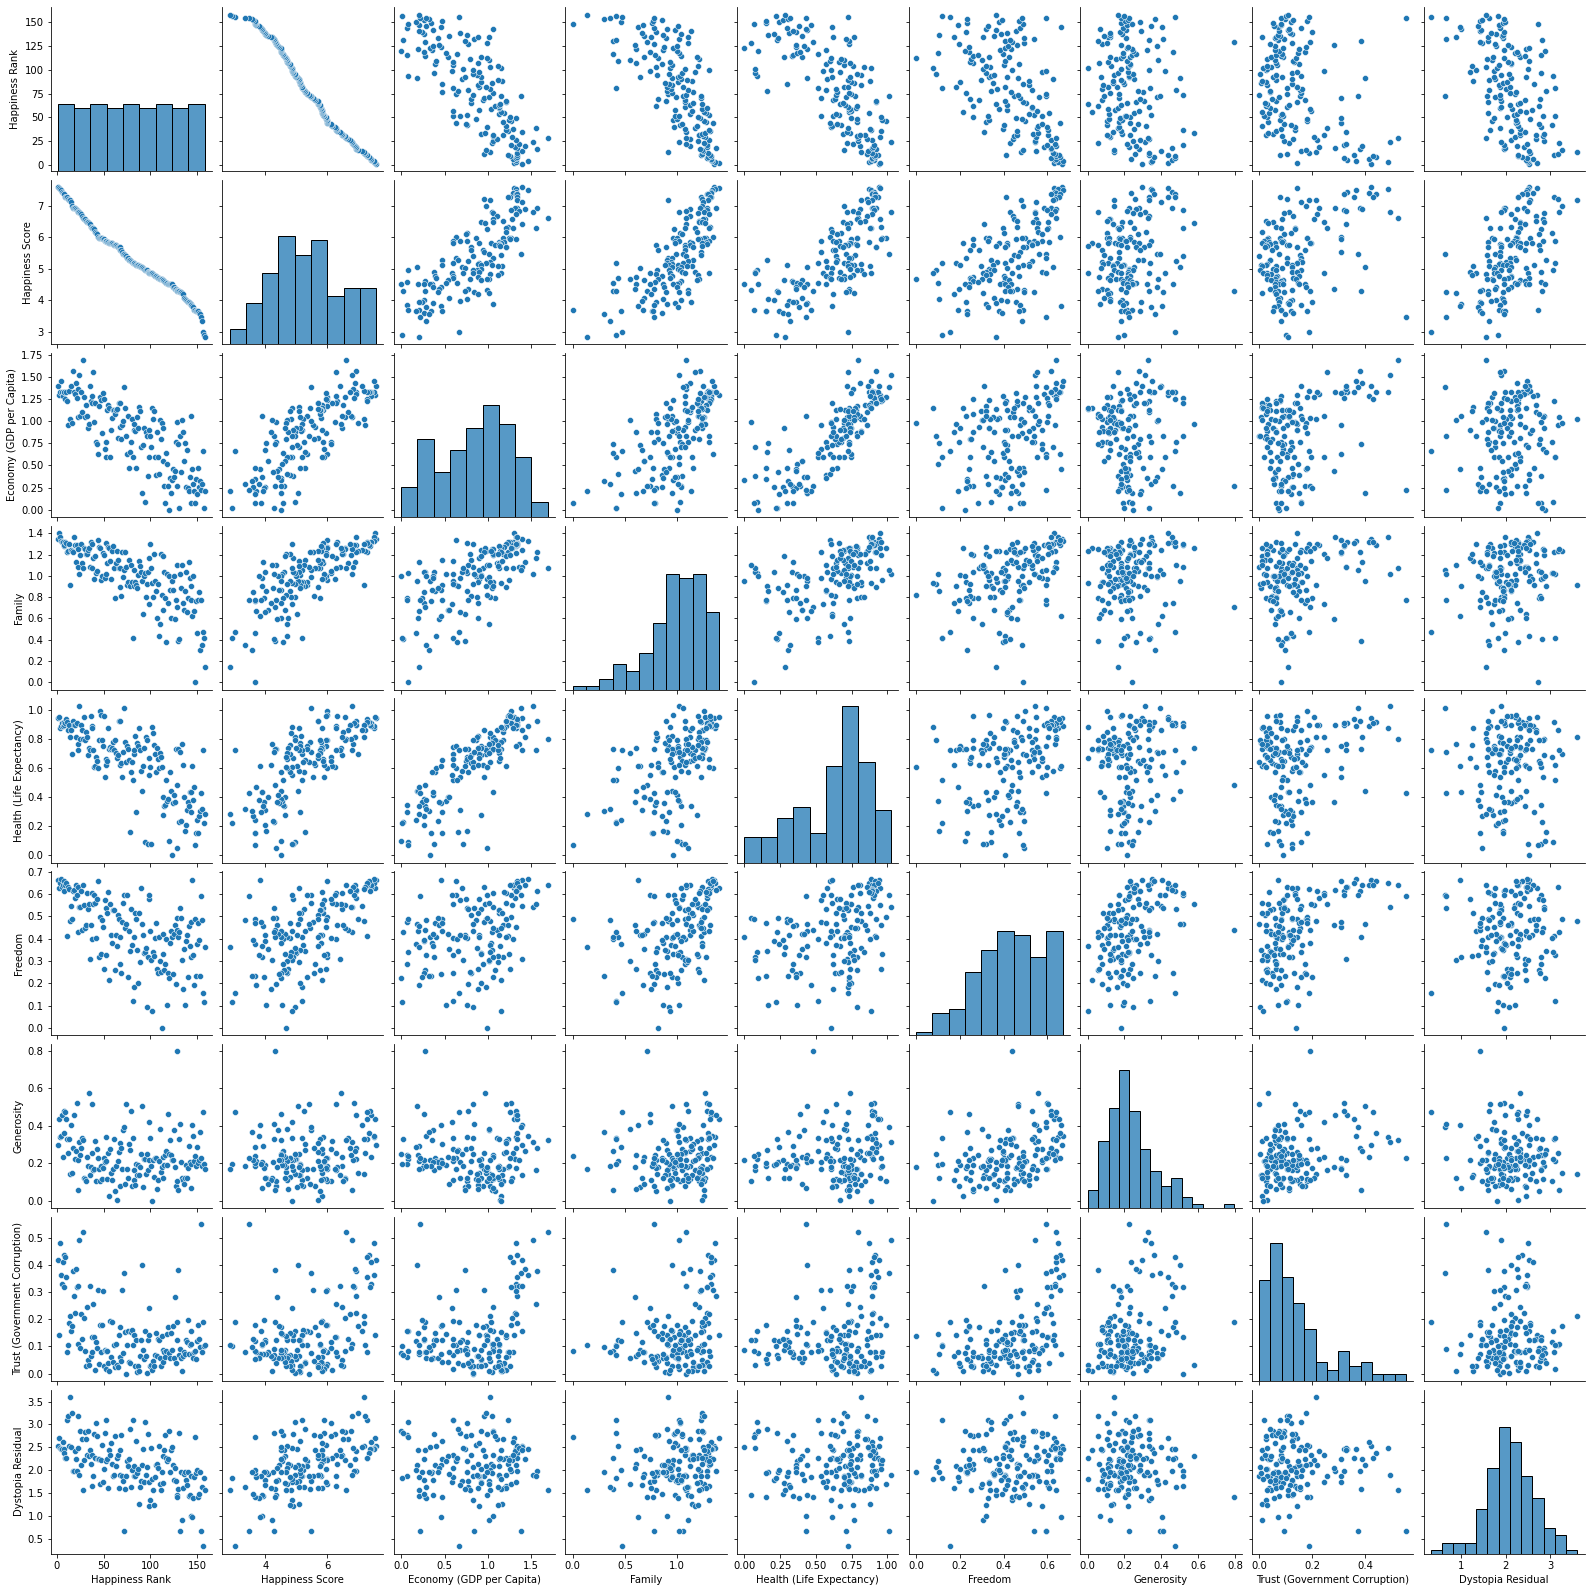

In [177]:
sns.pairplot(ds)
plt.show()

In [178]:
#Now we will find the variables are continous or discreate
ds.nunique()

Country                          158
Region                            10
Happiness Rank                   157
Happiness Score                  157
Economy (GDP per Capita)         158
Family                           158
Health (Life Expectancy)         157
Freedom                          158
Generosity                       158
Trust (Government Corruption)    157
Dystopia Residual                158
dtype: int64

In [179]:
# we can remove country from our data
ds=ds.drop('Country',axis=1)

In [180]:
ds.head()

,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738
1,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201
2,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204
3,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2.46531
4,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2.45176


In [181]:
# Now We can encode the region using label encoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
ds['Region']=le.fit_transform(ds['Region'])

In [182]:
ds

,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,9,1,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2.51738
1,9,2,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2.70201
2,9,3,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2.49204
3,9,4,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2.46531
4,5,5,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,8,154,3.465,0.22208,0.77370,0.42864,0.59201,0.22628,0.55191,0.67042
154,8,155,3.340,0.28665,0.35386,0.31910,0.48450,0.18260,0.08010,1.63328
155,4,156,3.006,0.66320,0.47489,0.72193,0.15684,0.47179,0.18906,0.32858
156,8,157,2.905,0.01530,0.41587,0.22396,0.11850,0.19727,0.10062,1.83302


In [183]:
#check whether skew ness is present or not
x=ds.drop(['Happiness Score'],axis=1)

In [184]:
y=ds['Happiness Score']

In [185]:
x.skew()

Region                          -0.116119
Happiness Rank                   0.000418
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Generosity                       1.001961
Trust (Government Corruption)    1.385463
Dystopia Residual               -0.238911
dtype: float64

In [186]:
#Family,Standard Error , Trust(Government Corruption), and Generosity have hign skewness

In [187]:
#so we have to reduce the skewness by using power transfor
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x_new=pd.DataFrame(x_new,columns=x.columns)
x_new.skew()#new skewness after power tranform

Region                          -0.228041
Happiness Rank                  -0.264365
Economy (GDP per Capita)        -0.127233
Family                          -0.169651
Health (Life Expectancy)        -0.183181
Freedom                         -0.080728
Generosity                       0.013320
Trust (Government Corruption)    0.185965
Dystopia Residual                0.022925
dtype: float64

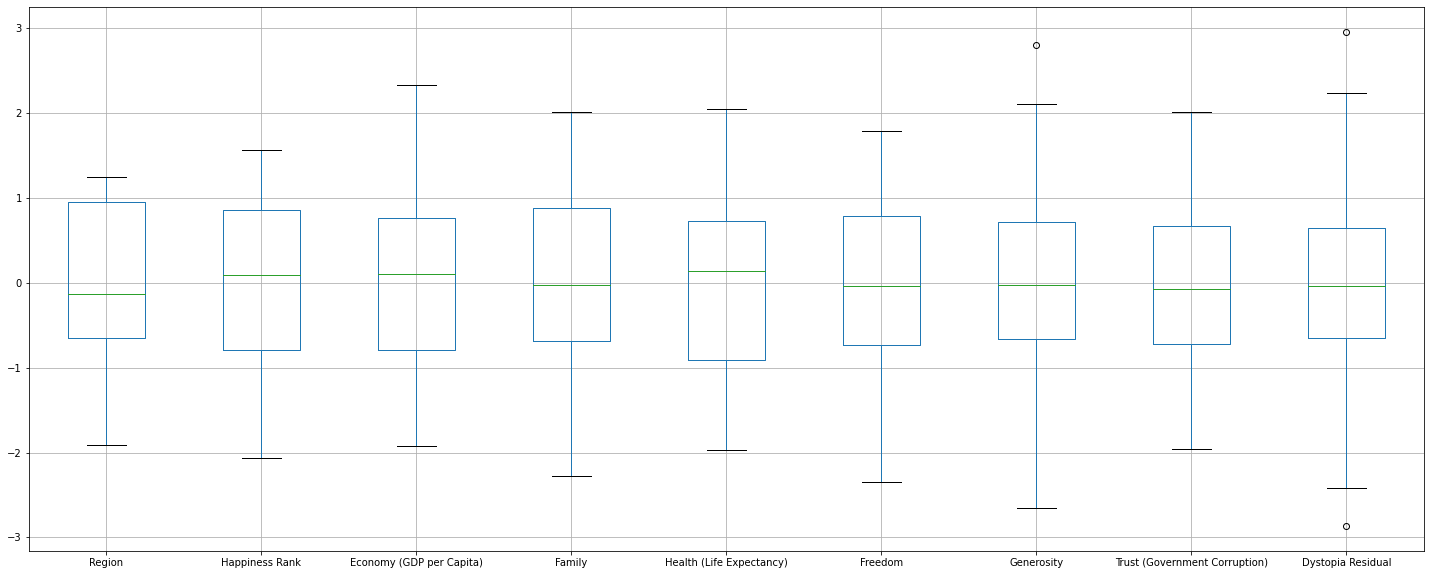

In [188]:
#now we have to check whether any outliers are present in the data for that we use box plot
x_new.boxplot(figsize=(25,10))
plt.show()

The box plot clearly show us that outliers are present in Standard Error, Generosity and dystopia Residual, So that we have to treat the same using zscore

In [189]:
from scipy import stats
z= np.abs(stats.zscore(x_new))
z

,Region,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,1.244530,2.063414,1.446061,1.669206,1.491765,1.756335,0.622391,1.773991,0.750992
1,1.244530,2.008498,1.173321,2.012132,1.532348,1.439946,1.480995,0.315993,1.110011
2,1.244530,1.958574,1.239836,1.739586,1.085223,1.615733,0.927973,1.906792,0.702275
3,1.244530,1.912062,1.630246,1.553118,1.147600,1.792821,0.964080,1.624007,0.651035
4,0.030337,1.868100,1.242168,1.501726,1.270179,1.475479,1.592224,1.503484,0.625118
...,...,...,...,...,...,...,...,...,...
153,0.955102,1.490877,1.494046,0.959885,0.939459,1.135229,0.065304,2.012856,2.393259
154,0.955102,1.508130,1.360829,1.896644,1.276496,0.307514,0.334169,0.433835,0.863565
155,0.303010,1.525352,0.513469,1.690664,0.262933,1.668658,1.659336,0.738915,2.866216
156,0.955102,1.542544,1.894954,1.796803,1.525700,1.849903,0.194829,0.151946,0.514801


In [190]:
#Now check any score gone beyond threshold 3
print(np.where(z>3))

(array([], dtype=int64), array([], dtype=int64))


In [191]:
z

,Region,Happiness Rank,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,1.244530,2.063414,1.446061,1.669206,1.491765,1.756335,0.622391,1.773991,0.750992
1,1.244530,2.008498,1.173321,2.012132,1.532348,1.439946,1.480995,0.315993,1.110011
2,1.244530,1.958574,1.239836,1.739586,1.085223,1.615733,0.927973,1.906792,0.702275
3,1.244530,1.912062,1.630246,1.553118,1.147600,1.792821,0.964080,1.624007,0.651035
4,0.030337,1.868100,1.242168,1.501726,1.270179,1.475479,1.592224,1.503484,0.625118
...,...,...,...,...,...,...,...,...,...
153,0.955102,1.490877,1.494046,0.959885,0.939459,1.135229,0.065304,2.012856,2.393259
154,0.955102,1.508130,1.360829,1.896644,1.276496,0.307514,0.334169,0.433835,0.863565
155,0.303010,1.525352,0.513469,1.690664,0.262933,1.668658,1.659336,0.738915,2.866216
156,0.955102,1.542544,1.894954,1.796803,1.525700,1.849903,0.194829,0.151946,0.514801


In [192]:
x_new = x_new[(z<3).all(axis=1)]
x_new.shape

(158, 9)

In [193]:
y =y[(z<3).all(axis=1)]
# now we have to standardize the data using power transform
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x_new=scale.fit_transform(x_new)

In [194]:
#Now find the best random state  
from sklearn.linear_model import LinearRegression # importing our model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score # for checkig our model accuracy
maxAccu = 0
maxRS = 0
lr = LinearRegression()
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size = .25, random_state = i)
    
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ", maxAccu, " on Random State ", maxRS)

Best accuracy is:  0.9974868543026868  on Random State  35


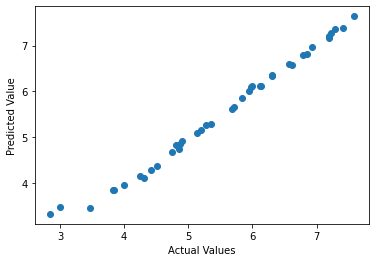

0.9902592327379665
Error
Mean Sqaured error = 0.015506805767423488
Root mean squared error= 0.12452632559994488


In [195]:
# slipt the data using best random sate=108 and Linear Regressiong using it
x_train,x_test,y_train,y_test = train_test_split(x_new,y,test_size = .25, random_state = 108)
lr.fit(x_train, y_train)
pred=lr.predict(x_test)
#Now  polt the actual Y and predicted y
plt.scatter(y_test,pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Value")
plt.show()
# also check mean squared error and abolute mean squared error
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(r2_score(y_test, pred))
print("Error")
print("Mean Sqaured error =",mean_squared_error(y_test,pred))
print("Root mean squared error=",np.sqrt(mean_squared_error(y_test,pred)))

from this we can examine that there is not much differance between predicted and actual values

0.9030568432802544
Error
Mean squared error:  0.15432857200000014
Root Mean Squared Error:  0.39284675383665846


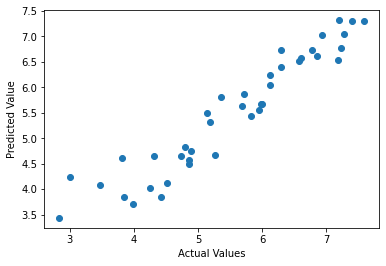

In [196]:
# Now find the predict the same using different algorithms

# Knn model
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(x_train, y_train)
predknn = knn.predict(x_test)
#check the accuracy score
print(r2_score(y_test,predknn))

print('Error')
print("Mean squared error: ", mean_squared_error(y_test,predknn))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, predknn)))

plt.scatter(y_test,predknn)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Value")
plt.show()

0.9964050044274048
Error
Mean squared error:  0.005723049999999988
Root Mean Squared Error:  0.07565084269193562


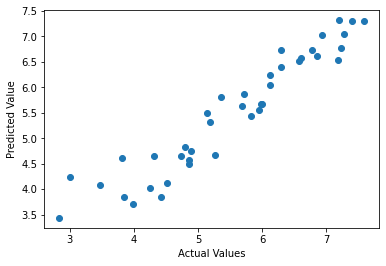

In [197]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr = dtr.predict(x_test)
print(r2_score(y_test,preddtr))
print('Error')

print("Mean squared error: ", mean_squared_error(y_test,preddtr))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, preddtr)))

plt.scatter(y_test,predknn)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Value")
plt.show()

0.9956250918543302
error
Mean squared error:  0.006964631126096442
Root Mean Squared Error:  0.08345436553048884


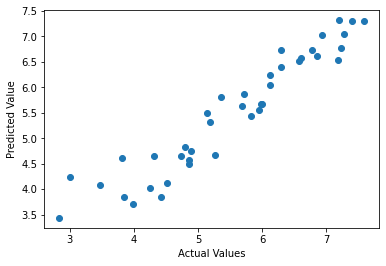

In [198]:
# Addaboost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score, KFold

ada_reg = AdaBoostRegressor(n_estimators = 100)

ada_reg.fit(x_train,y_train)
predada = ada_reg.predict(x_test)
#check the accuracy score
print(r2_score(y_test,predada))

print('error')

print("Mean squared error: ", mean_squared_error(y_test,predada))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, predada)))
plt.scatter(y_test,predknn)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Value")
plt.show()

# now we can find that Adaboost and Linear Regression algorithm gives maximum accuracy

Now we will check the cross validation score

In [199]:
#cross validation for linear regression
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(lr,x_new,y, cv=5)
print("Cross Validation Score for Linear Regression Model:",cvs.mean())


csv = cross_val_score(knn, x_new, y, cv = 5)
print("The cross validation score of Knn Regressoin Model :", cvs.mean())

csv = cross_val_score(dtr, x_new, y, cv = 5)
print("The cross validation score  Decission Tree Regressoin Model :", cvs.mean())

cvs = cross_val_score(ada_reg, x_new, y, cv = 5)
print("The cross validation score of AdaBoost Regressoin Model :", cvs.mean())

Cross Validation Score for Linear Regression Model: 0.7728920371202413
The cross validation score of Knn Regressoin Model : 0.7728920371202413
The cross validation score  Decission Tree Regressoin Model : 0.7728920371202413
The cross validation score of AdaBoost Regressoin Model : -2.4427002142886787


# After calculating the difference between actual accuracy score and cross validation score
Adaboost have better accuracy

In [200]:
# Now Hyper Parameter turning
from sklearn.model_selection import RandomizedSearchCV
#AdaBoostRegressor()
params={'n_estimators':[50,75],
        'learning_rate':[1.0,.5,.1,.2],
        'loss':['linear','square', 'exponential']
        }
rcv = RandomizedSearchCV(AdaBoostRegressor(), params, cv=3)
rcv.fit(x_train,y_train)

RandomizedSearchCV(cv=3, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [1.0, 0.5, 0.1, 0.2],
                                        'loss': ['linear', 'square',
                                                 'exponential'],
                                        'n_estimators': [50, 75]})

In [201]:
rcv.best_params_

{'n_estimators': 50, 'loss': 'exponential', 'learning_rate': 1.0}

In [202]:
adda=AdaBoostRegressor(n_estimators= 50, loss= 'square', learning_rate= 1.0)
adda.fit(x_train,y_train)
new_pred=adda.predict(x_test)
r2_score(y_test,new_pred)

0.9958191069827079

# Our model is achieved good accuracy
Now saving the model

In [203]:
import pickle
filename = 'Happyness.pkl'
pickle.dump(adda,open(filename, 'wb'))